In [36]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/MLDatasets/Loan_Default.csv")


In [38]:
df.shape

(148670, 34)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
property_value               15098
LTV                          15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
age                            200
submission_of_application      200
loan_purpose                   134
Neg_ammortization              121
term                            41
dtype: int64


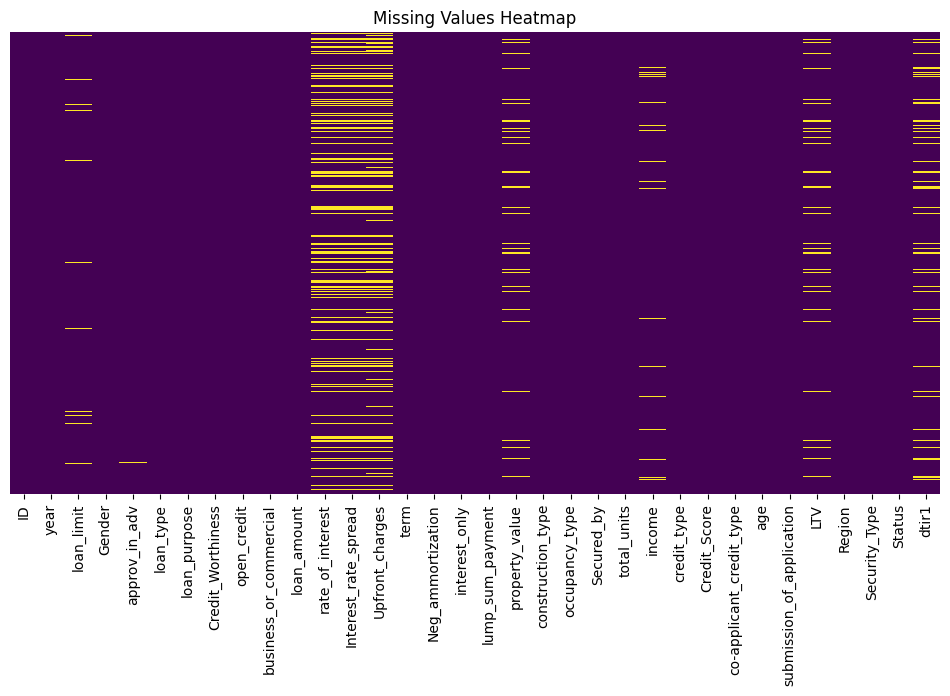

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [41]:
# Fill numerical missing values with median
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [42]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,75.135870,North,direct,1,39.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [43]:
# Encode categorical variables
cat_columns = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder

# Save label encoders
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

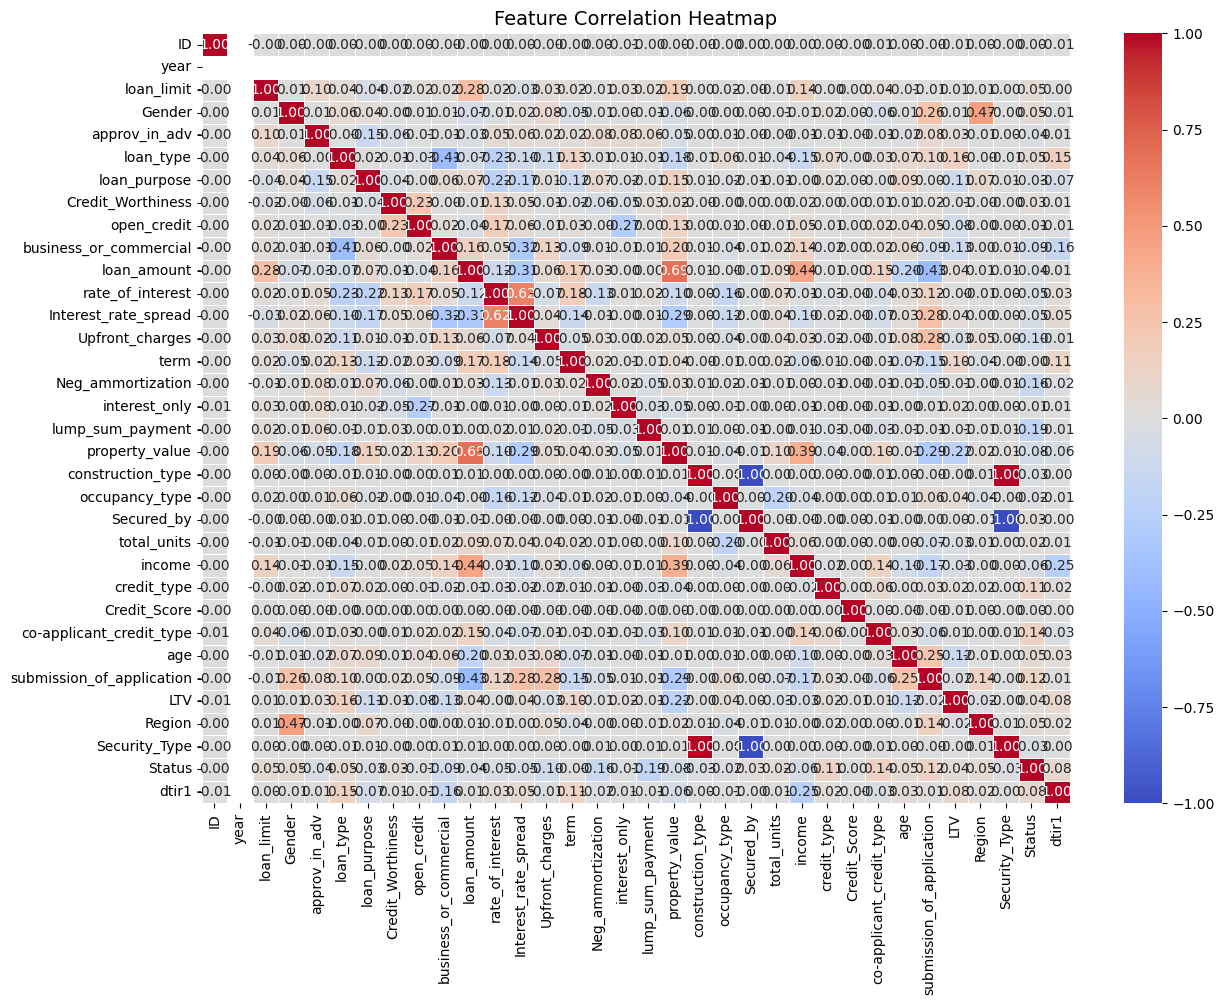

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Show plot
plt.show()


In [45]:
# Drop ID column
df.drop(columns=["ID"], inplace=True)

In [46]:
# Define features and target
X = df.drop(columns=["Status"])  # Features
y = df["Status"]  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the StandardScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ StandardScaler saved as 'scaler.pkl'.")

✅ StandardScaler saved as 'scaler.pkl'.


In [47]:
X_scaled[:2]

array([[ 0.        , -0.26822302,  1.32015286, -0.42935747, -0.5201538 ,
        -1.6470634 , -0.21081185, -0.0612688 ,  0.40288931, -1.16697989,
        -0.08575621, -0.0866192 , -0.16474408,  0.42560935,  0.33658736,
         0.2241117 ,  0.15261713, -1.0870095 ,  0.01490025,  0.10735176,
        -0.01490025, -0.10920238, -0.81644609,  1.39423928,  0.50235739,
        -0.99923349, -1.47410272,  0.74055386,  0.67931655,  1.08985426,
         0.01490025,  0.73074731],
       [ 0.        , -0.26822302,  0.37173675, -0.42935747,  1.01932831,
        -1.6470634 , -0.21081185, -0.0612688 , -2.48207135, -0.6776066 ,
        -0.08575621, -0.0866192 , -0.16474408,  0.42560935,  0.33658736,
         0.2241117 , -6.55234425, -0.20987016,  0.01490025,  0.10735176,
        -0.01490025, -0.10920238, -0.30216412,  0.55692751, -1.27541323,
         1.00076709,  0.50043727,  0.74055386,  0.05665677, -0.97566948,
         0.01490025,  0.10984681]])

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train RandomForest model
model_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)

# Save the model
with open("loan_model.pkl", "wb") as f:
    pickle.dump(model_rf, f)

print("✅ Model saved as 'loan_model.pkl'.")

✅ Model saved as 'loan_model.pkl'.


In [49]:
# Predictions
y_pred = model_rf.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Model Accuracy: {accuracy:.2f}")
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))

🔹 Model Accuracy: 1.00
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33609
           1       1.00      1.00      1.00     10992

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601



In [50]:
df = pd.read_csv("/content/drive/MyDrive/MLDatasets/Loan_Default.csv")

# Select categorical columns (object type)
cat_columns = df.select_dtypes(include=["object"]).columns

# Print unique values for each categorical column
for col in cat_columns:
    unique_values = df[col].unique()
    print(f"🔹 Column: {col} ({len(unique_values)} unique values)")
    print(unique_values)
    print("-" * 50)

🔹 Column: loan_limit (3 unique values)
['cf' nan 'ncf']
--------------------------------------------------
🔹 Column: Gender (4 unique values)
['Sex Not Available' 'Male' 'Joint' 'Female']
--------------------------------------------------
🔹 Column: approv_in_adv (3 unique values)
['nopre' 'pre' nan]
--------------------------------------------------
🔹 Column: loan_type (3 unique values)
['type1' 'type2' 'type3']
--------------------------------------------------
🔹 Column: loan_purpose (5 unique values)
['p1' 'p4' 'p3' 'p2' nan]
--------------------------------------------------
🔹 Column: Credit_Worthiness (2 unique values)
['l1' 'l2']
--------------------------------------------------
🔹 Column: open_credit (2 unique values)
['nopc' 'opc']
--------------------------------------------------
🔹 Column: business_or_commercial (2 unique values)
['nob/c' 'b/c']
--------------------------------------------------
🔹 Column: Neg_ammortization (3 unique values)
['not_neg' 'neg_amm' nan]
----------

<ipython-input-51-0633b03f2ba5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=sorted_features, palette="viridis")


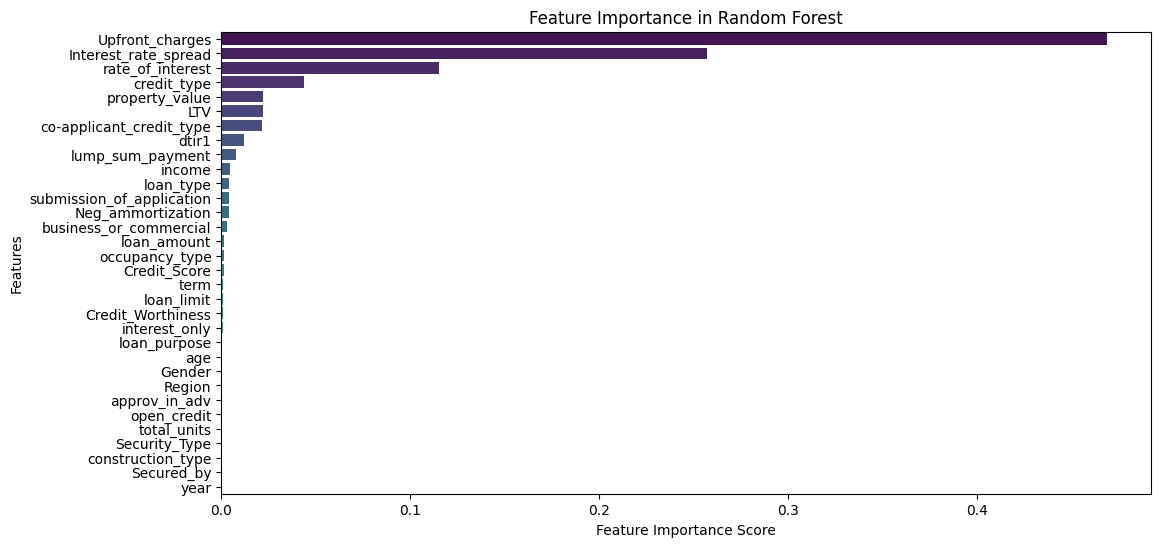

In [51]:
# Get feature importance
importances = model_rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_indices], y=sorted_features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()